## Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm,t
import statistics
import matplotlib.pyplot as plt
import random

## Data Cleaning

In [ ]:
def randomint(num):
  a=num*1000
  if a==0:
    return 0
  elif a==8000:
    b=(num+2)*1000
    num3 = random.randint(a,b)
    return float(num3/1000)
  else:
    b=(num-1)*1000
    num3 = random.randint(b,a)   
    return float(num3/1000)

In [ ]:
data = pd.read_csv('/content/sample_data/Factors effecting sleep (Responses) - Form Responses 1.csv')
df=pd.DataFrame(data,columns=['How much time do you spend on screens for recreational activities like gaming, social media and streaming?',
                                'How much time do you spend on sports or exercise/gym?',
                                'How much sleep do you get in a day?'])
df[['How much sleep do you get in a day?']] = df[['How much sleep do you get in a day?']].replace(["6-7 hrs","more than 8 hours","4-5 hrs","5-6 hrs","less than 4 hours"], [7,8,5,6,4], regex=True)

## Data and description for different amount of caffiene intakes

In [ ]:
games=['1-2 hrs','2-3 hrs', '4-5 hrs', '6 or more hours']
gym=['1-2 hrs','2-3 hrs','4 or more hours',"Don't exercise"] 
df_list=[]

In [ ]:
for i in games:
  df_list.append(df.loc[df['How much time do you spend on screens for recreational activities like gaming, social media and streaming?']==i])

In [ ]:
for diff in df_list:
  index=diff.index
  for i in index:
    c=diff.loc[i,'How much sleep do you get in a day?']
    diff.loc[i,'How much sleep do you get in a day?']=randomint(c)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
f=pd.concat(df_list)

In [ ]:
#for ci
game_frames=[]
for i in games:
  game_frames.append(f.loc[f['How much time do you spend on screens for recreational activities like gaming, social media and streaming?']==i])
gym_frames=[]
for i in gym:
  gym_frames.append(f.loc[f['How much time do you spend on sports or exercise/gym?']==i])

## Normal distribution graph and confidence intervals

### Confidence Interval

In [ ]:
def ci(x,confidence):
  m = x.mean() 
  s = x.std() 
  dof = len(x)-1 
  t_crit = np.abs(t.ppf((1-confidence)/2,dof))
  return (m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))
k=0
for i in game_frames:
  print("We can say with 95% confidence that the number of hours" 
                        +" of sleep is in the interval who spends {} on recreational activities".format(games[k]),
                         ci(np.array(i['How much sleep do you get in a day?']),0.95))
  k+=1

for i in gym_frames:
  print("We can say with 95% confidence that the number of hours" 
                         +" of sleep is in the interval who spends {} on sports/gym".format(gym[k%4]),
                         ci(np.array(i['How much sleep do you get in a day?']),0.95))
  k+=1

We can say with 95% confidence that the number of hours of sleep is in the interval who spends 1-2 hrs on recreational activities (6.258032835032703, 6.983403062403193)
We can say with 95% confidence that the number of hours of sleep is in the interval who spends 2-3 hrs on recreational activities (6.273249053212243, 6.968890481671478)
We can say with 95% confidence that the number of hours of sleep is in the interval who spends 4-5 hrs on recreational activities (6.447479681501022, 7.444277894256553)
We can say with 95% confidence that the number of hours of sleep is in the interval who spends 6 or more hours on recreational activities (5.789172890179394, 7.165885933350017)
We can say with 95% confidence that the number of hours of sleep is in the interval who spends 1-2 hrs on sports/gym (6.206056973583723, 6.742286776416276)
We can say with 95% confidence that the number of hours of sleep is in the interval who spends 2-3 hrs on sports/gym (6.2300715012463295, 7.475828498753667)
We 

In [ ]:
#tables for gaming
for i in game_frames:
  print(i.describe())
  print("\n")

       How much sleep do you get in a day?
count                            39.000000
mean                              6.620718
std                               1.133463
min                               4.521000
25%                               6.140500
50%                               6.608000
75%                               6.866000
max                               9.737000


       How much sleep do you get in a day?
count                            43.000000
mean                              6.621070
std                               1.143564
min                               4.337000
25%                               6.062500
50%                               6.526000
75%                               6.885500
max                              10.000000


       How much sleep do you get in a day?
count                            33.000000
mean                              6.945879
std                               1.427379
min                               4.015000
25%    

## Sea born box-plot

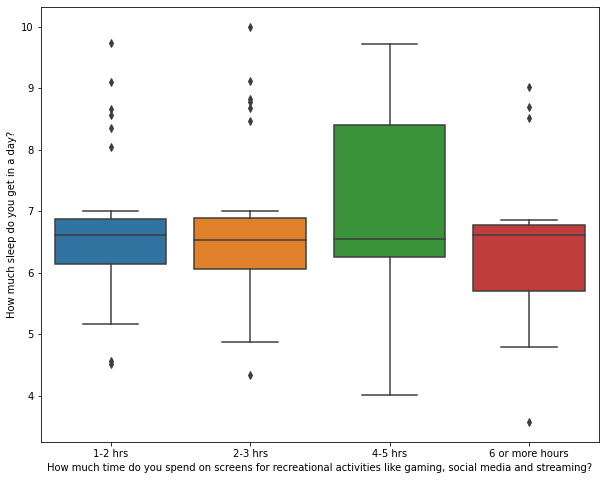

In [ ]:
#box plot of recreational activities hours
plt.figure(figsize=(10,8))
ax_games = sns.boxplot(x="How much time do you spend on screens for recreational activities like gaming, social media and streaming?",
                    y="How much sleep do you get in a day?", data=f, order=games)

In [ ]:
#tables for gym
for i in gym_frames:
  print(i.describe())
  print("\n")

       How much sleep do you get in a day?
count                            64.000000
mean                              6.474172
std                               1.081835
min                               4.252000
25%                               6.034000
50%                               6.402500
75%                               6.772750
max                               9.737000


       How much sleep do you get in a day?
count                             20.00000
mean                               6.85295
std                                1.36547
min                                4.01500
25%                                5.85400
50%                                6.64000
75%                                8.43950
max                                9.12100


       How much sleep do you get in a day?
count                             5.000000
mean                              6.606600
std                               0.242945
min                               6.323000
25%    

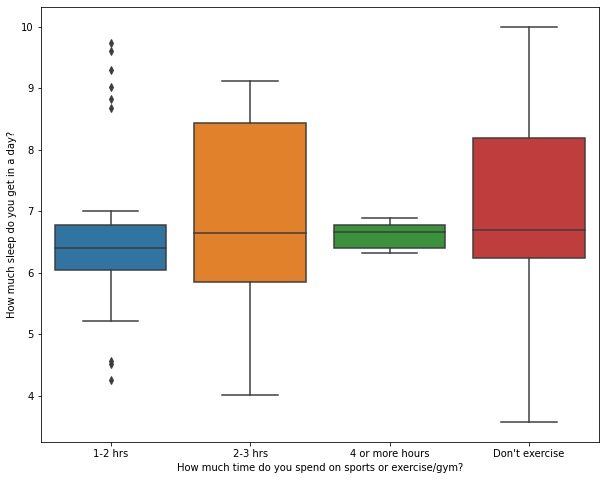

In [ ]:
#box plot of sports hours
plt.figure( figsize = ( 10,8 ) ) 
ax_sports = sns.boxplot( x = "How much time do you spend on sports or exercise/gym?",
                    y = "How much sleep do you get in a day?", data = f, order = gym)

In [ ]:
X = np.array( f [ 'How much sleep do you get in a day?' ] )
sample_size = 100

In [ ]:
sample_of_size_40 , sample_of_size_50 , sample_of_size_60 , sample_of_size_70 , sample_of_size_80 , sample_of_size_90 = [] , [] , [] , [] , [] , []

In [ ]:
for i in range ( sample_size ):
  sample_of_size_40.append ( np.random.choice ( X , 40 ) )
  sample_of_size_50.append ( np.random.choice ( X , 50 ) )
  sample_of_size_60.append ( np.random.choice ( X , 60 ) )
  sample_of_size_70.append ( np.random.choice ( X , 70 ) )
  sample_of_size_80.append ( np.random.choice ( X , 80 ) )
  sample_of_size_90.append ( np.random.choice ( X , 90 ) )

sample_of_size_40 = np.array ( sample_of_size_40 )
sample_of_size_50 = np.array ( sample_of_size_50 ) 
sample_of_size_60 = np.array ( sample_of_size_60 )
sample_of_size_70 = np.array ( sample_of_size_70 )
sample_of_size_80 = np.array ( sample_of_size_80 )
sample_of_size_90 = np.array ( sample_of_size_80 )

In [ ]:
means_40 , means_50 , means_60,means_70 , means_80 , means_90 = [] , [] , [] , [] , [] , []
for i in range ( sample_size ):
  means_40.append ( sample_of_size_40[i].mean() )
  means_50.append ( sample_of_size_50[i].mean() )
  means_60.append ( sample_of_size_60[i].mean() )
  means_70.append ( sample_of_size_70[i].mean() )
  means_80.append ( sample_of_size_80[i].mean() )
  means_90.append ( sample_of_size_80[i].mean() )

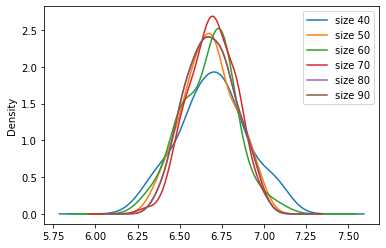

In [ ]:
fig,ax = plt.subplots()

df_40 = pd.DataFrame( { 'size 40' : np.array(means_40) } )
df_40.plot.kde( ax = ax )

df_50 = pd.DataFrame( { 'size 50':np.array(means_50) } )
df_50.plot.kde( ax = ax )

df_60 = pd.DataFrame( { 'size 60':np.array(means_60) } )
df_60.plot.kde( ax = ax )

df_70 = pd.DataFrame( { 'size 70':np.array(means_70) } )
df_70.plot.kde( ax = ax )

df_80 = pd.DataFrame( { 'size 80':np.array(means_80) } )
df_80.plot.kde( ax = ax )

df_90 = pd.DataFrame( { 'size 90':np.array(means_90) } )
df_90.plot.kde( ax = ax )

plt.show()

#sampling means of sleeping hours